In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ## World Map

In [131]:
df=pd.read_csv("green_valley.csv")
df.head()

,date,population
0,02-03-2022,21.0
1,03-05-2022,23.0
2,04-06-2022,27.0
3,21-09-2022,31.0
4,22-10-2022,34.0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        9 non-null      object 
 1   population  9 non-null      float64
dtypes: float64(1), object(1)
memory usage: 336.0+ bytes


In [133]:
df.isnull().sum()

date          4
population    4
dtype: int64

In [134]:
df["date"]= pd.to_datetime(df["date"])

<ipython-input-134-082167ba8dcc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["date"]= pd.to_datetime(df["date"])


In [135]:
 !pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
 from prophet import Prophet

In [137]:
population=df.groupby('date')['population'].sum().reset_index()

In [138]:
population.rename(columns={"date":"ds","population":"y"},inplace=True)

In [139]:
model=Prophet(interval_width=0.95)

In [140]:
model.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/j2bg7pqy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/qnq0s89y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89043', 'data', 'file=/tmp/tmpqki2d_87/j2bg7pqy.json', 'init=/tmp/tmpqki2d_87/qnq0s89y.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modelxnchkoo5/prophet_model-20230421062816.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:28:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:28:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

In [141]:
future_dates=model.make_future_dataframe(periods=30)

In [142]:
forecast=model.predict(future_dates)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-26   9.472706   19.072922   30.313173     9.472706     9.472706   
1  2022-02-03   9.605041   17.360163   28.135569     9.605041     9.605041   
2  2022-02-27  10.002045   17.723203   28.860470    10.002045    10.002045   
3  2022-03-05  10.101296   21.341630   32.442220    10.101296    10.101296   
4  2022-04-06  10.630635   19.875314   31.081613    10.630635    10.630635   
5  2022-09-21  13.409664   22.762855   33.874191    13.409664    13.409664   
6  2022-10-22  13.922461   24.678214   35.977777    13.922461    13.922461   
7  2022-11-24  14.468342   22.289978   33.341182    14.468342    14.468342   
8  2023-01-25  15.493936   25.180895   36.227696    15.493936    15.493936   
9  2023-01-26  15.510478   23.031770   34.408550    15.510478    15.510478   
10 2023-01-27  15.527020   -8.605097    1.521670    15.527020    15.527020   
11 2023-01-28  15.543562   26.511365   37.302448    15.543562   

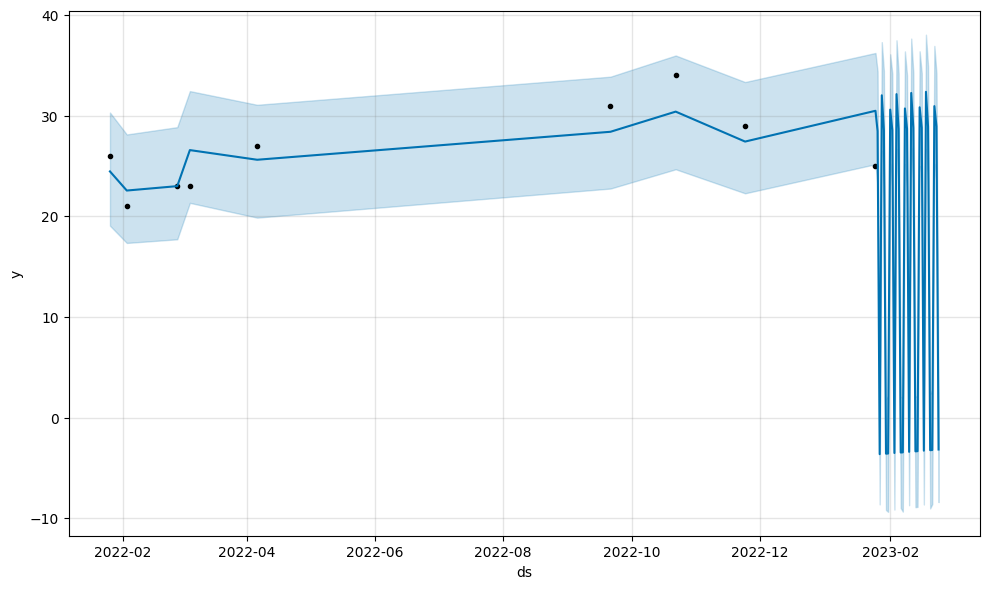

In [143]:
model.plot(forecast)
print(forecast)

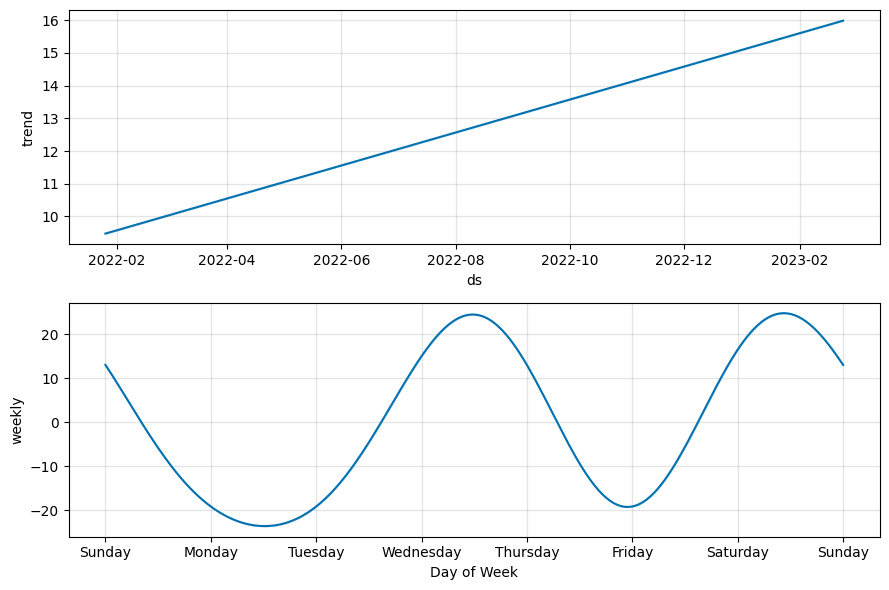

In [144]:
component=model.plot_components(forecast)

In [145]:
 model1=Prophet(interval_width=0.95)

In [146]:
 model1.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/wox_cit5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/hsgyxy7b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98115', 'data', 'file=/tmp/tmpqki2d_87/wox_cit5.json', 'init=/tmp/tmpqki2d_87/hsgyxy7b.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_model5t9qo6vq/prophet_model-20230421062841.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:28:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:28:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

In [147]:
future_dates=model1.make_future_dataframe(periods=10)

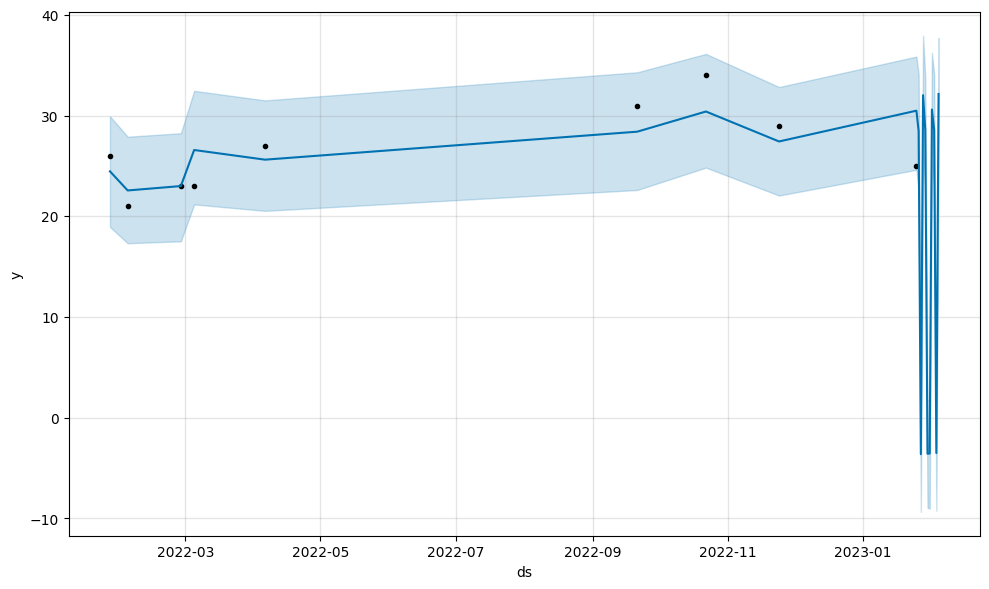

In [148]:
forecasting=model.predict(future_dates)
ploting=model.plot(forecasting)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-26   9.472706   18.942329   29.928627     9.472706     9.472706   
1  2022-02-03   9.605041   17.325836   27.900932     9.605041     9.605041   
2  2022-02-27  10.002045   17.517657   28.246365    10.002045    10.002045   
3  2022-03-05  10.101296   21.180611   32.457693    10.101296    10.101296   
4  2022-04-06  10.630635   20.540104   31.508682    10.630635    10.630635   
5  2022-09-21  13.409664   22.611240   34.297533    13.409664    13.409664   
6  2022-10-22  13.922461   24.836348   36.122912    13.922461    13.922461   
7  2022-11-24  14.468342   22.059515   32.833099    14.468342    14.468342   
8  2023-01-25  15.493936   24.618130   35.854534    15.493936    15.493936   
9  2023-01-26  15.510478   22.550833   34.095918    15.510478    15.510478   
10 2023-01-27  15.527020   -9.347439    1.683338    15.527020    15.527020   
11 2023-01-28  15.543562   26.070776   37.930752    15.543562   

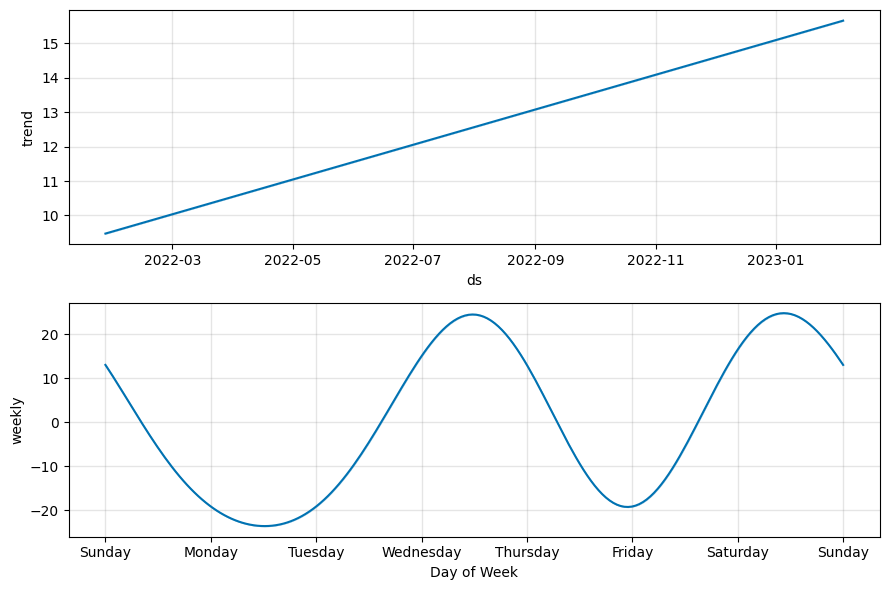

In [149]:
week=model1.plot_components(forecasting)
print(forecasting)